Subset containing Balloon Flower, and Bird of Paradise

Focus on **Fine-tuned VGG 16 model** to predict Balloon Flower, or Bird of Paradise

In [1]:
import os
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_dir = 'CNN flowers dataset/train'
test_dir = 'CNN flowers dataset/test'
valid_dir = 'CNN flowers dataset/valid'

In [3]:
flower_classes = os.listdir(train_dir)

In [4]:
num_class = len(flower_classes)

In [5]:
# Generate batches
train_batches = ImageDataGenerator().flow_from_directory(train_dir,target_size=(224,224), classes=flower_classes, batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_dir,target_size=(224,224), classes=flower_classes, batch_size=40)
valid_batches = ImageDataGenerator().flow_from_directory(valid_dir,target_size=(224,224), classes=flower_classes, batch_size=4)


Found 140 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# Plot image with labels

In [6]:
#plot image with labels
def plots(ims,figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
# borrow from smileservices's utils.py

In [7]:
imgs, labels = next(train_batches)

C:\Users\Joe\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


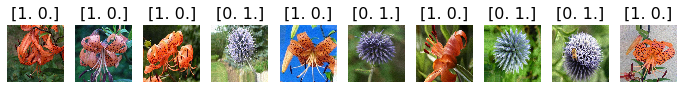

In [8]:
#plot image with labels
plots(imgs,titles=labels)

[1,0] would present a kind of flowers

[0,1] would present another kind of flowers

#### [0,1] => [0] => Bird of paradise
#### [1,0] => [1] => Balloon flower

# Build and train CNN

Build a simple cnn to see result

In [9]:
# build a simple cnn
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(num_class, activation='softmax'),
])
# one convolutional layer
# no filter
# one dense layer

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit_generator(train_batches, steps_per_epoch=14,validation_data=valid_batches, validation_steps=4, epochs=5, verbose=num_class)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 7s - loss: 7.9439 - accuracy: 0.5071 - val_loss: 4.0295 - val_accuracy: 0.5000
Epoch 2/5
 - 6s - loss: 7.9439 - accuracy: 0.5071 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 3/5
 - 7s - loss: 7.9439 - accuracy: 0.5071 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 4/5
 - 7s - loss: 7.9439 - accuracy: 0.5071 - val_loss: 16.1181 - val_accuracy: 0.5000
Epoch 5/5
 - 7s - loss: 7.9439 - accuracy: 0.5071 - val_loss: 8.0590 - val_accuracy: 0.5000


Run 5 Epochs, we have large loss, the accuracy and validation accuracy is about 50%. 

The simple is not well which is expected.

# Predict simple CNN model

In [12]:
#borrow from scikit learn.org
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
def cnn_predict_cm(test_batches, model):
    test_imgs, test_labels = next(test_batches)
    plots(test_imgs, titles = test_labels)
    test_labels = test_labels[:,0]
    print(test_labels)
    predictions = model.predict_generator(test_batches,steps=1,verbose=0)
    cnn_cm = confusion_matrix(test_labels, np.round(predictions[:,0]))
    return cnn_cm
    

[0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.]


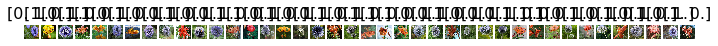

In [14]:
cnn_cm = cnn_predict_cm(test_batches, model)

Confusion matrix, without normalization
[[20  0]
 [19  1]]


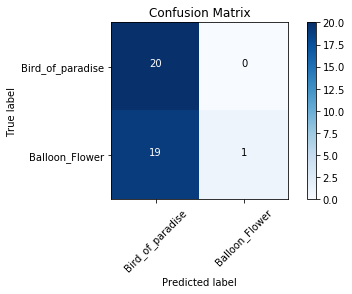

In [15]:
plot_confusion_matrix(cnn_cm,flower_classes[::-1], title='Confusion Matrix')

20 Bird of paradise and 1 Balloon flower are predicted correctted.

19 Balloon flowers are incorrectly predicted. 

Rebuild CNN model

# Build Fine-tuned VGG 16 model

VGG16 has pre-trained model that can classify up to 1000 different objects. 

But this peoject does not need this much.

In [16]:
#import vgg16 model
vgg16_model = keras.applications.vgg16.VGG16()

In [17]:
vgg16_model.summary()# lots of different layers

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
model = Sequential()
for layer in vgg16_model.layers[:-1]: #delete prediction change to 2 classifications for this work
    model.add(layer)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [20]:
for layer in model.layers:
    layer.trainable = False# block future train

In [21]:
model.add(Dense(num_class,activation='softmax'))
# change last dense layer to be 2 objects

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# Train vgg16 model

In [23]:
model.compile(Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit_generator(train_batches, steps_per_epoch=14,validation_data=valid_batches, validation_steps=4, epochs=5, verbose=num_class)

Epoch 1/5
 - 108s - loss: 0.6446 - accuracy: 0.7429 - val_loss: 0.1382 - val_accuracy: 0.9375
Epoch 2/5
 - 97s - loss: 0.0962 - accuracy: 0.9786 - val_loss: 0.0080 - val_accuracy: 0.9375
Epoch 3/5
 - 91s - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.9375
Epoch 4/5
 - 93s - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.1518 - val_accuracy: 1.0000
Epoch 5/5
 - 96s - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.1317 - val_accuracy: 1.0000


Run 5 Epochs, loss minimizes from 0.6446 to 0.0083; accuracy increases from 0.7429 to 1; validation accuracy increases from 0.9375 to 1.

Recall previous CNN model having 7.9439 loss and 0.5 accuracy.

# Predict using vgg16 model 

Using test dataset to test the prediction accuracy of trained VGG16 model

[1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]


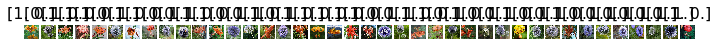

In [27]:
cnn_cm = cnn_predict_cm(test_batches, model)

Confusion matrix, without normalization
[[20  0]
 [ 0 20]]


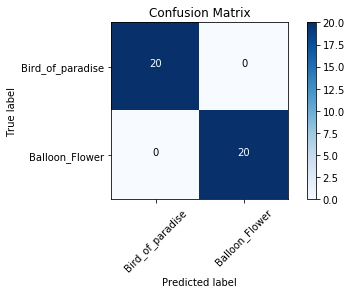

In [28]:
plot_confusion_matrix(cnn_cm,flower_classes[::-1], title='Confusion Matrix')

All testing predicted correctly

Recall the confusion matrix of previous model having 19 incorrectly prediction. 

# Input an image to predict

Insert a new image to see the prediction result

In [31]:
img_dir = 'CNN flowers dataset/input_predict/18506.jpg'

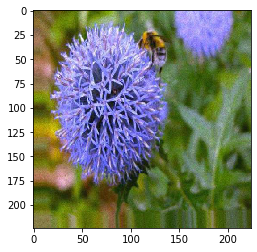

In [32]:
image = load_img(img_dir, target_size=(224, 224))
plt.imshow(image)

In [33]:
# load an image to predict
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

flower_pred = model.predict(image)
np.round(flower_pred)

array([[0., 1.]], dtype=float32)

In [34]:
print('This flower is ' + flower_classes[::-1][int(np.round(flower_pred[:,0])[0])])

This flower is Bird_of_paradise


### Credits: 
#### The whole concept and main process of vgg16: youtube channel deeplizard: https://www.youtube.com/watch?v=LhEMXbjGV_4&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=10
#### Plots image with labels function borrowed from smileservices's utils.py https://github.com/smileservices/keras_utils/blob/master/utils.py
#### Plot confusion matrix function borrowed from scikit-learn.org https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
#### Keras' preprocessing image function inspired from machinelearningmastery.com https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/